<a href="https://colab.research.google.com/github/FoxFortino/DSPS_WFortino/blob/main/HW8/higgsbosonSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- Download the Higgs boson data from Kaggle (programmatically within the notebook)
see how I did it in the Titanic Trees notebook https://github.com/fedhere/DSPS/blob/master/lab9/titanictree.ipynb

find the correct API link here https://www.kaggle.com/c/higgs-boson/data


In [87]:
import json
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

In [3]:
envs = json.load(open("/content/drive/MyDrive/.kaggle/kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [4]:
# !mkdir -p /content/drive/MyDrive/Higgs

In [5]:
# !cd /content/drive/MyDrive/Higgs

In [6]:
# !kaggle competitions download -c higgs-boson

In [7]:
!ls /content/drive/MyDrive/Higgs

HiggsBosonCompetition_AMSMetric_rev1.py  test.zip
random_submission.zip			 training.zip



- Read in the trainind data. Split the provided training data into a training and a test set. 
The last 2 columns are what you want to predict: "weight" and "label".
Remove them from the input data and create a separate variable label and a separate variable weight, which will be your target variables for, respectively, classification and regression.



In [8]:
higgsdata = pd.read_csv("/content/drive/MyDrive/Higgs/training.zip")

label = higgsdata["Label"]
weight = higgsdata["Weight"]
higgsdata = higgsdata.drop(columns=["Label", "Weight"])
higgsdata.shape

(250000, 31)

In [9]:
higgsdata.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


In [10]:
higgsdata.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,158.432217,1.437609,-0.128305,-708.985189,38.707419,-0.010973,-0.008171,46.660207,-0.019507,0.043543,41.717235,-0.010119,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,115.706115,0.844743,1.193585,453.596721,22.412081,1.214079,1.816763,22.064922,1.264982,1.816611,32.894693,1.812223,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,46.104000,0.047000,-1.414000,-999.000000,20.000000,-2.499000,-3.142000,26.000000,-2.505000,-3.142000,0.109000,-3.142000,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,77.550000,0.883000,-1.371000,-999.000000,24.591750,-0.925000,-1.575000,32.375000,-1.014000,-1.522000,21.398000,-1.575000,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,120.664500,1.280000,-0.356000,-999.000000,31.804000,-0.023000,-0.033000,40.516000,-0.045000,0.086000,34.802000,-0.024000,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,200.478250,1.777000,1.225000,0.000000,45.017000,0.898000,1.565000,53.390000,0.959000,1.618000,51.895000,1.561000,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,19.773000,1.414000,1.000000,764.408000,2.497000,3.142000,560.271000,2.503000,3.142000,2842.617000,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000


In [11]:
split = tts(higgsdata, label, weight, train_size=0.60)
Xtrain, Xtest, Ltrain, Ltest, Wtrain, Wtest = split

In [16]:
label.values

array(['s', 'b', 'b', ..., 's', 'b', 'b'], dtype=object)

In [17]:
weight.values

array([0.00265331, 2.23358449, 2.34738894, ..., 0.01863612, 1.68161144,
       1.87747381])

- Use a Random Forest and a Gradiend Boosted Tree Classifier model to predict the label of the particles. get the score of the model on the training and test set and comment on the result for each model.


In [ ]:
max_depth_test = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None]
rng = np.random.RandomState(193)

In [36]:
for md in max_depth_test:
    rf =  RandomForestClassifier(
        n_estimators=10,
        criterion="gini",
        max_depth=md,
        random_state=rng
    )
    rf_fit = rf.fit(Xtrain, Ltrain)
    test_score = rf.score(Xtest, Ltest)
    train_score = rf.score(Xtrain, Ltrain)
    print(f"Max Depth: {md}")
    print(f"    Train Score: {train_score:.3f}")
    print(f"    Test Score: {test_score:.3f}")

Max Depth: 1
    Train Score: 0.656
    Test Score: 0.660
Max Depth: 2
    Train Score: 0.724
    Test Score: 0.724
Max Depth: 3
    Train Score: 0.768
    Test Score: 0.768
Max Depth: 4
    Train Score: 0.803
    Test Score: 0.801
Max Depth: 5
    Train Score: 0.811
    Test Score: 0.809
Max Depth: 6
    Train Score: 0.819
    Test Score: 0.815
Max Depth: 7
    Train Score: 0.821
    Test Score: 0.818
Max Depth: 8
    Train Score: 0.830
    Test Score: 0.825
Max Depth: 9
    Train Score: 0.835
    Test Score: 0.825
Max Depth: 10
    Train Score: 0.842
    Test Score: 0.828
Max Depth: None
    Train Score: 0.988
    Test Score: 0.821


# Random Forest Classifier Discussion

We nootice that for the training and test sets the score of the classifier plateaus at a max depth of 4. We also note that at a max depth of 9 the test score is 1 percent lower than the train score. Setting max depth to none yields a fully overfitted dataset. We choose a max depth of 4 for this work.

In [40]:
rf =  RandomForestClassifier(
    n_estimators=100,
    criterion="gini",
    max_depth=4,
    random_state=rng
)
rf_fit = rf.fit(Xtrain, Ltrain)
test_score = rf.score(Xtest, Ltest)
train_score = rf.score(Xtrain, Ltrain)
print(f"Max Depth: {4}")
print(f"    Train Score: {train_score:.3f}")
print(f"    Test Score: {test_score:.3f}")

Max Depth: None
    Train Score: 0.812
    Test Score: 0.811


In [37]:
for md in max_depth_test:
    gbt =  GradientBoostingClassifier(
        n_estimators=10,
        # criterion="gini",
        max_depth=md,
        random_state=rng
    )
    gbt_fit = gbt.fit(Xtrain, Ltrain)
    test_score = gbt.score(Xtest, Ltest)
    train_score = gbt.score(Xtrain, Ltrain)
    print(f"Max Depth: {md}")
    print(f"    Train Score: {train_score:.3f}")
    print(f"    Test Score: {test_score:.3f}")

Max Depth: 1
    Train Score: 0.656
    Test Score: 0.660
Max Depth: 2
    Train Score: 0.793
    Test Score: 0.793
Max Depth: 3
    Train Score: 0.804
    Test Score: 0.803
Max Depth: 4
    Train Score: 0.808
    Test Score: 0.807
Max Depth: 5
    Train Score: 0.815
    Test Score: 0.814
Max Depth: 6
    Train Score: 0.825
    Test Score: 0.822
Max Depth: 7
    Train Score: 0.829
    Test Score: 0.824
Max Depth: 8
    Train Score: 0.836
    Test Score: 0.827
Max Depth: 9
    Train Score: 0.844
    Test Score: 0.828
Max Depth: 10
    Train Score: 0.855
    Test Score: 0.829
Max Depth: None
    Train Score: 1.000
    Test Score: 0.768


# Gradient Boosting Classifier Discussion

We nootice that for the training and test sets the score of the classifier plateaus at a max depth of 2 or 3. We also note that at a max depth of 8 the test score is almost 1 percent lower than the train score. Setting max depth to none yields a fully overfitted dataset. We choose a max depth of 3 for this work.

In [43]:
gbt =  GradientBoostingClassifier(
    n_estimators=100,
    # criterion="gini",
    max_depth=3,
    random_state=rng
)
gbt_fit = gbt.fit(Xtrain, Ltrain)
test_score = gbt.score(Xtest, Ltest)
train_score = gbt.score(Xtrain, Ltrain)
print(f"Max Depth: {3}")
print(f"    Train Score: {train_score:.3f}")
print(f"    Test Score: {test_score:.3f}")

Max Depth: None
    Train Score: 0.835
    Test Score: 0.831


- Produce a confusion matrix for each model and compare them


 



In [46]:

pl = plt
# I creaded this function (mostly copied from sklearn examples). 
# You can use it to create the confusion matrix
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title='',
                          cmap=pl.cm.bone):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """         
    if normalize:
          title = title + ' Normalized confusion matrix'
    else:
          title = title + ' Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # plot it
    fig, ax = plt.subplots(1, 1)
    fig.subplots_adjust()
    im = ax.imshow(cm, cmap=cmap)
    ax_divider = make_axes_locatable(ax)
    # add an axes to the right of the main axes.
    pl.xticks([0, 1], labels=["N", "P"])
    pl.ylim(-0.5,1.5)
    pl.yticks([0,1], labels=["N", "P"])    
    pl.title(title)
    cax = ax_divider.append_axes("right", size="10%", pad="2%")
    cb = pl.colorbar(im, cax=cax)
    

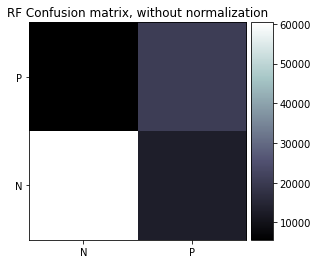

In [51]:
plot_confusion_matrix(rf.predict(Xtest.values), Ltest.values, title="RF")

### Figure 1: Confusion matrix for the Random Forest classifier with a max depth of 4 and 100 estimators. We see that the model performs well at predicting true negatives, whereas prediciting true positives was more difficult for this model. Without domain knowledge, it is impossible to know whether this confusion matrix would be acceptable for the problem it is trying to solve.

In [56]:
Ltest.shape

(100000,)

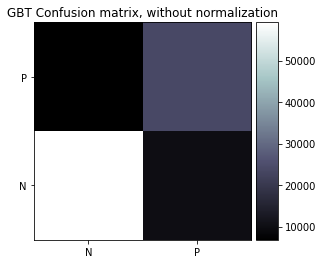

In [53]:
plot_confusion_matrix(gbt.predict(Xtest.values), Ltest.values, title="GBT")

### Figure 2: Confusion matrix for the Gradient Boosting classifier with a max depth of 3 and 100 estimators. We see that the model performs well at predicting true negatives, whereas prediciting true positives was more difficult for this model. Without domain knowledge, it is impossible to know whether this confusion matrix would be acceptable for the problem it is trying to solve. This model performs similarly to the Random Forest Classifier shown in Figure 1.


- Use a Random Forest and a Gradiend Boosted Tree Regressor model to predict the weight of the particles. Compare the model performance on training and test setsm


In [62]:
for md in max_depth_test:
    rfr =  RandomForestRegressor(
        n_estimators=10,
        criterion="squared_error",
        max_depth=md,
        random_state=rng
    )
    rfr_fit = rfr.fit(Xtrain, Wtrain)
    test_score = rfr.score(Xtest, Wtest)
    train_score = rfr.score(Xtrain, Wtrain)
    print(f"Max Depth: {md}")
    print(f"    Train Score: {train_score:.3f}")
    print(f"    Test Score: {test_score:.3f}")

Max Depth: 1
    Train Score: 0.253
    Test Score: 0.253
Max Depth: 2
    Train Score: 0.417
    Test Score: 0.417
Max Depth: 3
    Train Score: 0.480
    Test Score: 0.478
Max Depth: 4
    Train Score: 0.523
    Test Score: 0.520
Max Depth: 5
    Train Score: 0.554
    Test Score: 0.550
Max Depth: 6
    Train Score: 0.583
    Test Score: 0.575
Max Depth: 7
    Train Score: 0.602
    Test Score: 0.588
Max Depth: 8
    Train Score: 0.621
    Test Score: 0.600
Max Depth: 9
    Train Score: 0.639
    Test Score: 0.605
Max Depth: 10
    Train Score: 0.661
    Test Score: 0.611
Max Depth: None
    Train Score: 0.926
    Test Score: 0.583


We see that this random forest regressor starts to become overfitted at a max depth of about 7 when the test score lags behind the train score by more than 1 percent. We choose max depth of 6 for this work.

In [77]:
rfr =  RandomForestRegressor(
    n_estimators=100,
    criterion="squared_error",
    max_depth=6,
    random_state=rng
)
rfr_fit = rfr.fit(Xtrain, Wtrain)
test_score = rfr.score(Xtest, Wtest)
train_score = rfr.score(Xtrain, Wtrain)
print(f"Max Depth: {6}")
print(f"    Train Score: {train_score:.3f}")
print(f"    Test Score: {test_score:.3f}")

Max Depth: 6
    Train Score: 0.584
    Test Score: 0.576


In [65]:
for md in max_depth_test:
    gbtr =  GradientBoostingRegressor(
        n_estimators=10,
        criterion="squared_error",
        max_depth=md,
        random_state=rng
    )
    gbtr_fit = gbtr.fit(Xtrain, Wtrain)
    test_score = gbtr.score(Xtest, Wtest)
    train_score = gbtr.score(Xtrain, Wtrain)
    print(f"Max Depth: {md}")
    print(f"    Train Score: {train_score:.3f}")
    print(f"    Test Score: {test_score:.3f}")

Max Depth: 1
    Train Score: 0.289
    Test Score: 0.289
Max Depth: 2
    Train Score: 0.406
    Test Score: 0.404
Max Depth: 3
    Train Score: 0.452
    Test Score: 0.449
Max Depth: 4
    Train Score: 0.484
    Test Score: 0.480
Max Depth: 5
    Train Score: 0.505
    Test Score: 0.498
Max Depth: 6
    Train Score: 0.522
    Test Score: 0.512
Max Depth: 7
    Train Score: 0.538
    Test Score: 0.524
Max Depth: 8
    Train Score: 0.553
    Test Score: 0.531
Max Depth: 9
    Train Score: 0.570
    Test Score: 0.536
Max Depth: 10
    Train Score: 0.591
    Test Score: 0.539
Max Depth: None
    Train Score: 0.878
    Test Score: 0.409


We see that this gradient boosting regressor starts to become overfitted at a max depth of about 6 when the test score lags behind the train score by almost 1 percent. We choose max depth of 5 for this work.

In [76]:
gbtr =  GradientBoostingRegressor(
    n_estimators=100,
    criterion="squared_error",
    max_depth=5,
    random_state=rng
)
gbtr_fit = gbtr.fit(Xtrain, Wtrain)
test_score = gbtr.score(Xtest, Wtest)
train_score = gbtr.score(Xtrain, Wtrain)
print(f"Max Depth: {5}")
print(f"    Train Score: {train_score:.3f}")
print(f"    Test Score: {test_score:.3f}")

Max Depth: 5
    Train Score: 0.646
    Test Score: 0.622


 Calculate the L2 and L1 loss functions for the fitted regression models (see slides for the definition) and discuss the results

In [78]:
def L(X, Y, model, p):
    return np.sum(np.power(np.abs(Y - model.predict(X)), p), axis=0)

In [79]:
print(f"L1 RF: {L(Xtest, Wtest, rfr, 1)}")
print(f"L2 RF: {L(Xtest, Wtest, rfr, 2)}")
print()
print(f"L1 GBT: {L(Xtest, Wtest, gbtr, 1)}")
print(f"L2 GBT: {L(Xtest, Wtest, gbtr, 2)}")

L1 RF: 88422.41038259173
L2 RF: 149212.61167265577

L1 GBT: 81314.48220373476
L2 GBT: 132932.8809652285


L1 and L2 loss functions calculated for the random forest and gradient boosting regressors. The criteria for quality of each split for both models was "squared error" which likely corresponds to the L2 loss function. In both cases, the gradient boosting model performs better.

# For the Random Forest Classifier, select the 4 most important features (see how in the Titanic notebook)

In [82]:
print("Random Forest feature importance")
for f, fi in zip(higgsdata.columns, rf.feature_importances_):
  print(f, fi.round(2))

Random Forest feature importance
EventId 0.0
DER_mass_MMC 0.27
DER_mass_transverse_met_lep 0.19
DER_mass_vis 0.08
DER_pt_h 0.01
DER_deltaeta_jet_jet 0.03
DER_mass_jet_jet 0.03
DER_prodeta_jet_jet 0.01
DER_deltar_tau_lep 0.02
DER_pt_tot 0.0
DER_sum_pt 0.02
DER_pt_ratio_lep_tau 0.06
DER_met_phi_centrality 0.09
DER_lep_eta_centrality 0.03
PRI_tau_pt 0.1
PRI_tau_eta 0.0
PRI_tau_phi 0.0
PRI_lep_pt 0.0
PRI_lep_eta 0.0
PRI_lep_phi 0.0
PRI_met 0.02
PRI_met_phi 0.0
PRI_met_sumet 0.0
PRI_jet_num 0.0
PRI_jet_leading_pt 0.01
PRI_jet_leading_eta 0.0
PRI_jet_leading_phi 0.0
PRI_jet_subleading_pt 0.0
PRI_jet_subleading_eta 0.0
PRI_jet_subleading_phi 0.0
PRI_jet_all_pt 0.01


The four most important features are:
*   DER_mass_MMC
*   DER_mass_transverse_met_lep
*   DER_met_phi_centrality
*   DER_mass_vis

These features represent:
*   The estimated mass of the Higgs candidate.
*   The transverse mass between the missing transverse energy and the leptop.
*   The centrality of the azimuthal angle of the missing transverse energy vector w.r.t. the hadronic tau and the lepton.
*   The invariant mass of the hadronic tau and the lepton.



- For the Random Forest classifier, find the 4 most important features based on the simple unoptimized model you created earlier on. Use the documentation to find out what they are. We have not talked abotu the physics of this problem at all but the Kaggle challenge description should provide enogh information for you to comment on this result is somewhat superficially.

    You can use ```rf.feature_importance_``` on the trained model to extract the relative importance of each feature (a number from 0 to 1) and then choose the features that have the 4 highest numbers (the numpy function ```argsort()``` is helpful here!)

- Explore the parameter space with the sklearn module ```sklearn.model_selection.RandomizedSearchCV``` *fitting only those 4 features*

    Follow this example to set up the parameter search. Set the estimators to 10 and 100, (the number of trees) and the max depth to 3, and 10, and None (let it be unconstrained). Set bootstrap to both True and False. Set the number of features to consider at every split to both "autp" and "sqrt". Use ```pprint``` like I did earlier in this notebook to print the parameters set

**this takes some computational time! so do not start this at the last minute!!**

 



In [88]:
feats = ["DER_mass_MMC",
         "DER_mass_transverse_met_lep",
         "DER_met_phi_centrality",
         "DER_mass_vis"]
random_grid = {'max_depth': [3, 10, None],
               'max_features': ['auto', 'sqrt'],
               'n_estimators': [10, 100, 1000]}

In [91]:
RandomizedSearchCV?

In [92]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# search across 18 different combinations
random_search = RandomizedSearchCV(estimator = rf, param_distributions=random_grid,
                                   n_iter=1, cv=3)


Note that this may take a long time! It took 1 hour for me to run this. Dont start at the last minute!!

In [95]:
random_search.fit(Xtrain, y=Ltrain)
                  

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(max_depth=4,
                                                    random_state=RandomState(MT19937) at 0x7FA20AF9F160),
                   n_iter=1,
                   param_distributions={'max_depth': [3, 10, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [10, 100, 1000]})

In [96]:
random_search.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=1000,
                       random_state=RandomState(MT19937) at 0x7FA20F6DAE20)

In [97]:
random_search.best_params_

{'n_estimators': 1000, 'max_features': 'auto', 'max_depth': 10}

In [98]:
rf_random = RandomForestClassifier(**random_search.best_params_)

In [99]:
rf_random_fit = rf_random.fit(Xtrain, Ltrain)

In [100]:
rf_random_fit.score(Xtrain, Ltrain), rf_random_fit.score(Xtest, Ltest)

(0.8439466666666666, 0.83072)

In [101]:
df = pd.DataFrame(random_search.cv_results_)


In [102]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,359.601106,1.413564,7.814248,0.250386,1000,auto,10,"{'n_estimators': 1000, 'max_features': 'auto',...",0.83088,0.832,0.8315,0.83146,0.000458,1
